In [1]:
import pandas as pd
import numpy as np
from utils import get_species, get_labels, get_labels_all

In [10]:
X = get_species()
y = get_labels()
y_all = get_labels_all()

In [48]:
X = X[list(filter(lambda x : "virus" not in x, X.columns))]

In [49]:
studies = np.unique(X.index.get_level_values(0))
studies

array(['GMHI-10', 'GMHI-11', 'GMHI-13', 'GMHI-14', 'GMHI-15', 'GMHI-17',
       'GMHI-19', 'GMHI-2', 'GMHI-21', 'GMHI-23', 'GMHI-24', 'GMHI-26',
       'GMHI-27', 'GMHI-28', 'GMHI-3', 'GMHI-31', 'GMHI-32', 'GMHI-33',
       'GMHI-4', 'GMHI-5', 'GMHI-9', 'GMHI-V-35', 'GMHI-V-36',
       'GMHI-V-38', 'GMHI-V-40', 'GMHI-V-41', 'P103', 'P107', 'P11',
       'P110', 'P113', 'P121', 'P13', 'P132', 'P133', 'P135', 'P136',
       'P140', 'P15', 'P17', 'P2', 'P21', 'P24', 'P32', 'P34', 'P39',
       'P4', 'P47', 'P48', 'P53', 'P56', 'P57', 'P59', 'P63', 'P69',
       'P74', 'P76', 'P77', 'P8', 'P80', 'P81', 'P86', 'P87', 'P88',
       'P89', 'P9', 'P94', 'P95', 'P96', 'P98'], dtype=object)

In [202]:
(y_all == "Obese").sum()

PHENOTYPE_Disease    27
dtype: int64

In [69]:
np.unique(y_all)

array(['ACVD', 'Adenoma', 'Adenoma (MP)', 'Advanced Dementia',
       'Behcet’s disease', 'Breast Cancer', 'CD', 'CRC', 'Cancer',
       "Crohn''s disease", 'Crohns disease',
       'End-stage renal disease (ESRD)', 'Graves’ disease', 'Healthy',
       'Hypertension (HTN)', 'IGT', 'Large adenoma', 'Liver Cirrhosis',
       'NAFLD', 'Non–small cell lung cancer (NSCLC)', 'Obese', 'Obesity',
       'Overweight', 'Pancreatic cancer', 'Renal cell carcinoma (RCC)',
       'Rheumatoid Arthritis', 'Rheumatoid arthritis', 'Small adenoma',
       'T2D', 'Ulcerative colitis', 'Underweight', 'adenoma',
       'advanced adenoma', 'ankylosing spondylitis', 'carcinoma',
       'schizophrenia', 'ulcerative colitis'], dtype=object)

In [192]:
phenotypes = ((y_all == "Healthy") | (y_all == "Underweight")).values
phenotypes

array([[ True],
       [ True],
       [ True],
       ...,
       [ True],
       [ True],
       [ True]])

In [193]:
X_select = X.iloc[phenotypes, :]
y_select = y.iloc[phenotypes, :]
y_all_select = y_all.iloc[phenotypes, :]

In [194]:
np.unique(y_all_select)

array(['Healthy', 'Underweight'], dtype=object)

In [195]:
from sklearn.decomposition import PCA

In [196]:
c = 0.00001

pca = PCA(n_components=2, random_state=42)
pca.fit(X_select > c)

PCA(n_components=2, random_state=42)

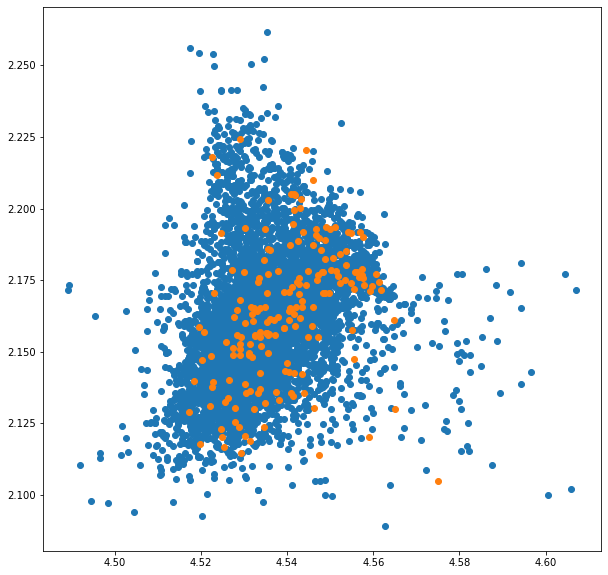

In [197]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 10))
projections = pca.transform(X_select)
plt.scatter(projections[y_select.values.flatten(), 0], projections[y_select.values.flatten(), 1])
plt.scatter(projections[~y_select.values.flatten(), 0], projections[~y_select.values.flatten(), 1])

In [30]:
for study in studies:
    print(np.unique(y_all_noweight.loc[study]))

['Healthy']
['Healthy' 'advanced adenoma' 'carcinoma']
['Healthy']
['Healthy']
['Healthy']
['Healthy' 'Rheumatoid arthritis']
['Healthy']
['ACVD' 'Healthy']
['Healthy' 'Hypertension (HTN)']
['CRC' 'Healthy']
['Healthy']
['Healthy']
['CRC' 'Healthy']
['CD' 'Healthy' 'Ulcerative colitis']
['Cancer' 'Healthy' 'Large adenoma' 'Small adenoma']
['CD' 'Healthy']
['Healthy']
['Healthy' 'Liver Cirrhosis']
['Healthy' 'T2D']
['Healthy' 'IGT' 'T2D']
['Crohns disease' 'Healthy' 'Ulcerative colitis']
['Healthy']
['NAFLD']
['CRC' 'Healthy' 'adenoma']
['CRC' 'Healthy']
['Healthy' 'ankylosing spondylitis']
['Healthy']


KeyError: 'P107'

In [6]:
y.loc[studies[0]]

,PHENOTYPE_Disease
Sample Accession,
SAMN03283239,Healthy
SAMN03283266,Healthy
SAMN03283281,Healthy
SAMN03283245,Healthy
SAMN03283294,Healthy
SAMN03283288,Healthy
SAMN03283255,Healthy
SAMN03283260,Healthy
SAMN03283250,Healthy


In [ ]:
y

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import accuracy_score
c = 0.00001

clf = LogisticRegression(random_state=42, penalty="l1", solver="liblinear", C=1)
clf.fit(X_train > c, y_train)
y_hat = clf.predict(X_test > c)
balanced_accuracy_score(y_test, y_hat), accuracy_score(y_test, y_hat)

/Users/daniel/opt/anaconda3/envs/data/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(0.652988863852356, 0.6565616274431592)

In [22]:
import seaborn as sns

In [23]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(y_test, y_hat)
mat

array([[699, 480],
       [381, 947]])

<AxesSubplot:>

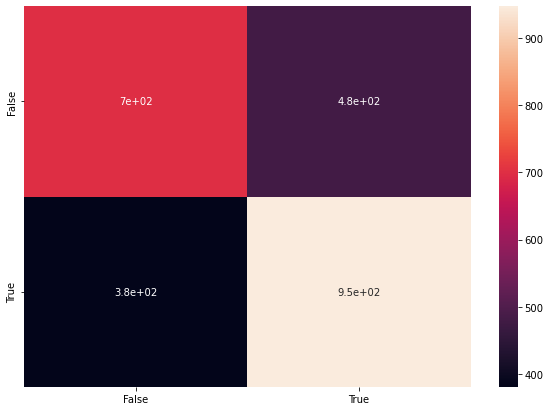

In [24]:
import matplotlib.pyplot as plt

df_cm = pd.DataFrame(mat, index = [lab for lab in np.unique(y)],
                  columns = [lab for lab in np.unique(y)])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True)